In [1]:
# 将供应链上同一节点的不同位置进行拆分

import networkx as nx
graph=nx.read_graphml("result\Weiqiao\魏桥多层级连边染色_子网络.graphml")
graph.nodes()

NodeView(('上海永进电缆（集团）有限公司', '北京信创合技术有限公司', '乌克兰', 'NICHOLL FOOD PACKAGING LIMITED', '美国特赛公司', '上海钢联电子商务股份有限公司', '滨州鸿博铝业科技有限公司', '丰田自动织机株式会社', '邹平市文化和旅游局', '中信戴卡股份有限公司', 'Inditex', '厦门象屿兴泓超细材料有限公司', '常州艾柯轧辊有限公司', '宏远卓越', '德龙镍业有限公司', '北京斯泰恩环球科技有限公司', '远博实业发展有限公司', '青岛润丰铝箔有限公司', '京东集团股份有限公司', '富锦象屿金谷生化科技有限公司', '辽宁忠旺集团有限公司', '惠民县新材料产业园', '华新电力线缆有限公司', '厦门国际物流港有限责任公司', '埃克森美孚公司', '新疆东方希望有色金属有限公司', '中国第一汽车集团有限公司', '山东宏拓实业有限公司', 'Press Metal Berhad', '优泰科技', '供应商三', '无锡市捷安轧辊制造有限公司', '中国有色金属工业第六冶金建设有限公司', 'PT Obsidian Stainless Steel', '群星线缆有限公司', '中国中煤能源股份有限公司', '邹平县汇才新材料科技有限公司', '惠民县创大木业有限公司', '广饶宏源液压机械厂', '思爱普（SAP）', '长江有色金属集团有限公司', '河南省中联红星电瓷有限责任公司', '冰轮环境技术股份有限公司', '山东科建检测服务有限公司', '美利坚合众国', '香港象正贸易有限公司', '山东创新集团有限公司', 'Aluchemie', '邹平县汇聚新材料科技有限公司', '索通发展股份有限公司', '厦门象屿物业服务有限公司', '上海库柏电力电容器有限公司', '山东南山铝业股份有限公司', '德丰金属有限公司', '宏创控股集团有限公司', '云南铝业股份有限公司', '云南省慈善总会', '湖南三德科技股份有限公司', '国家电网有限公司山东省电力公司', '邹平县人民政府', '邹平县宏茂新材料科技有限公司', '供应商二', '武汉锅炉有限公司', '山东魏桥轻量化材料有限公司', '天津市索通国际工贸有限公司', '山东宏创铝业控股股份有

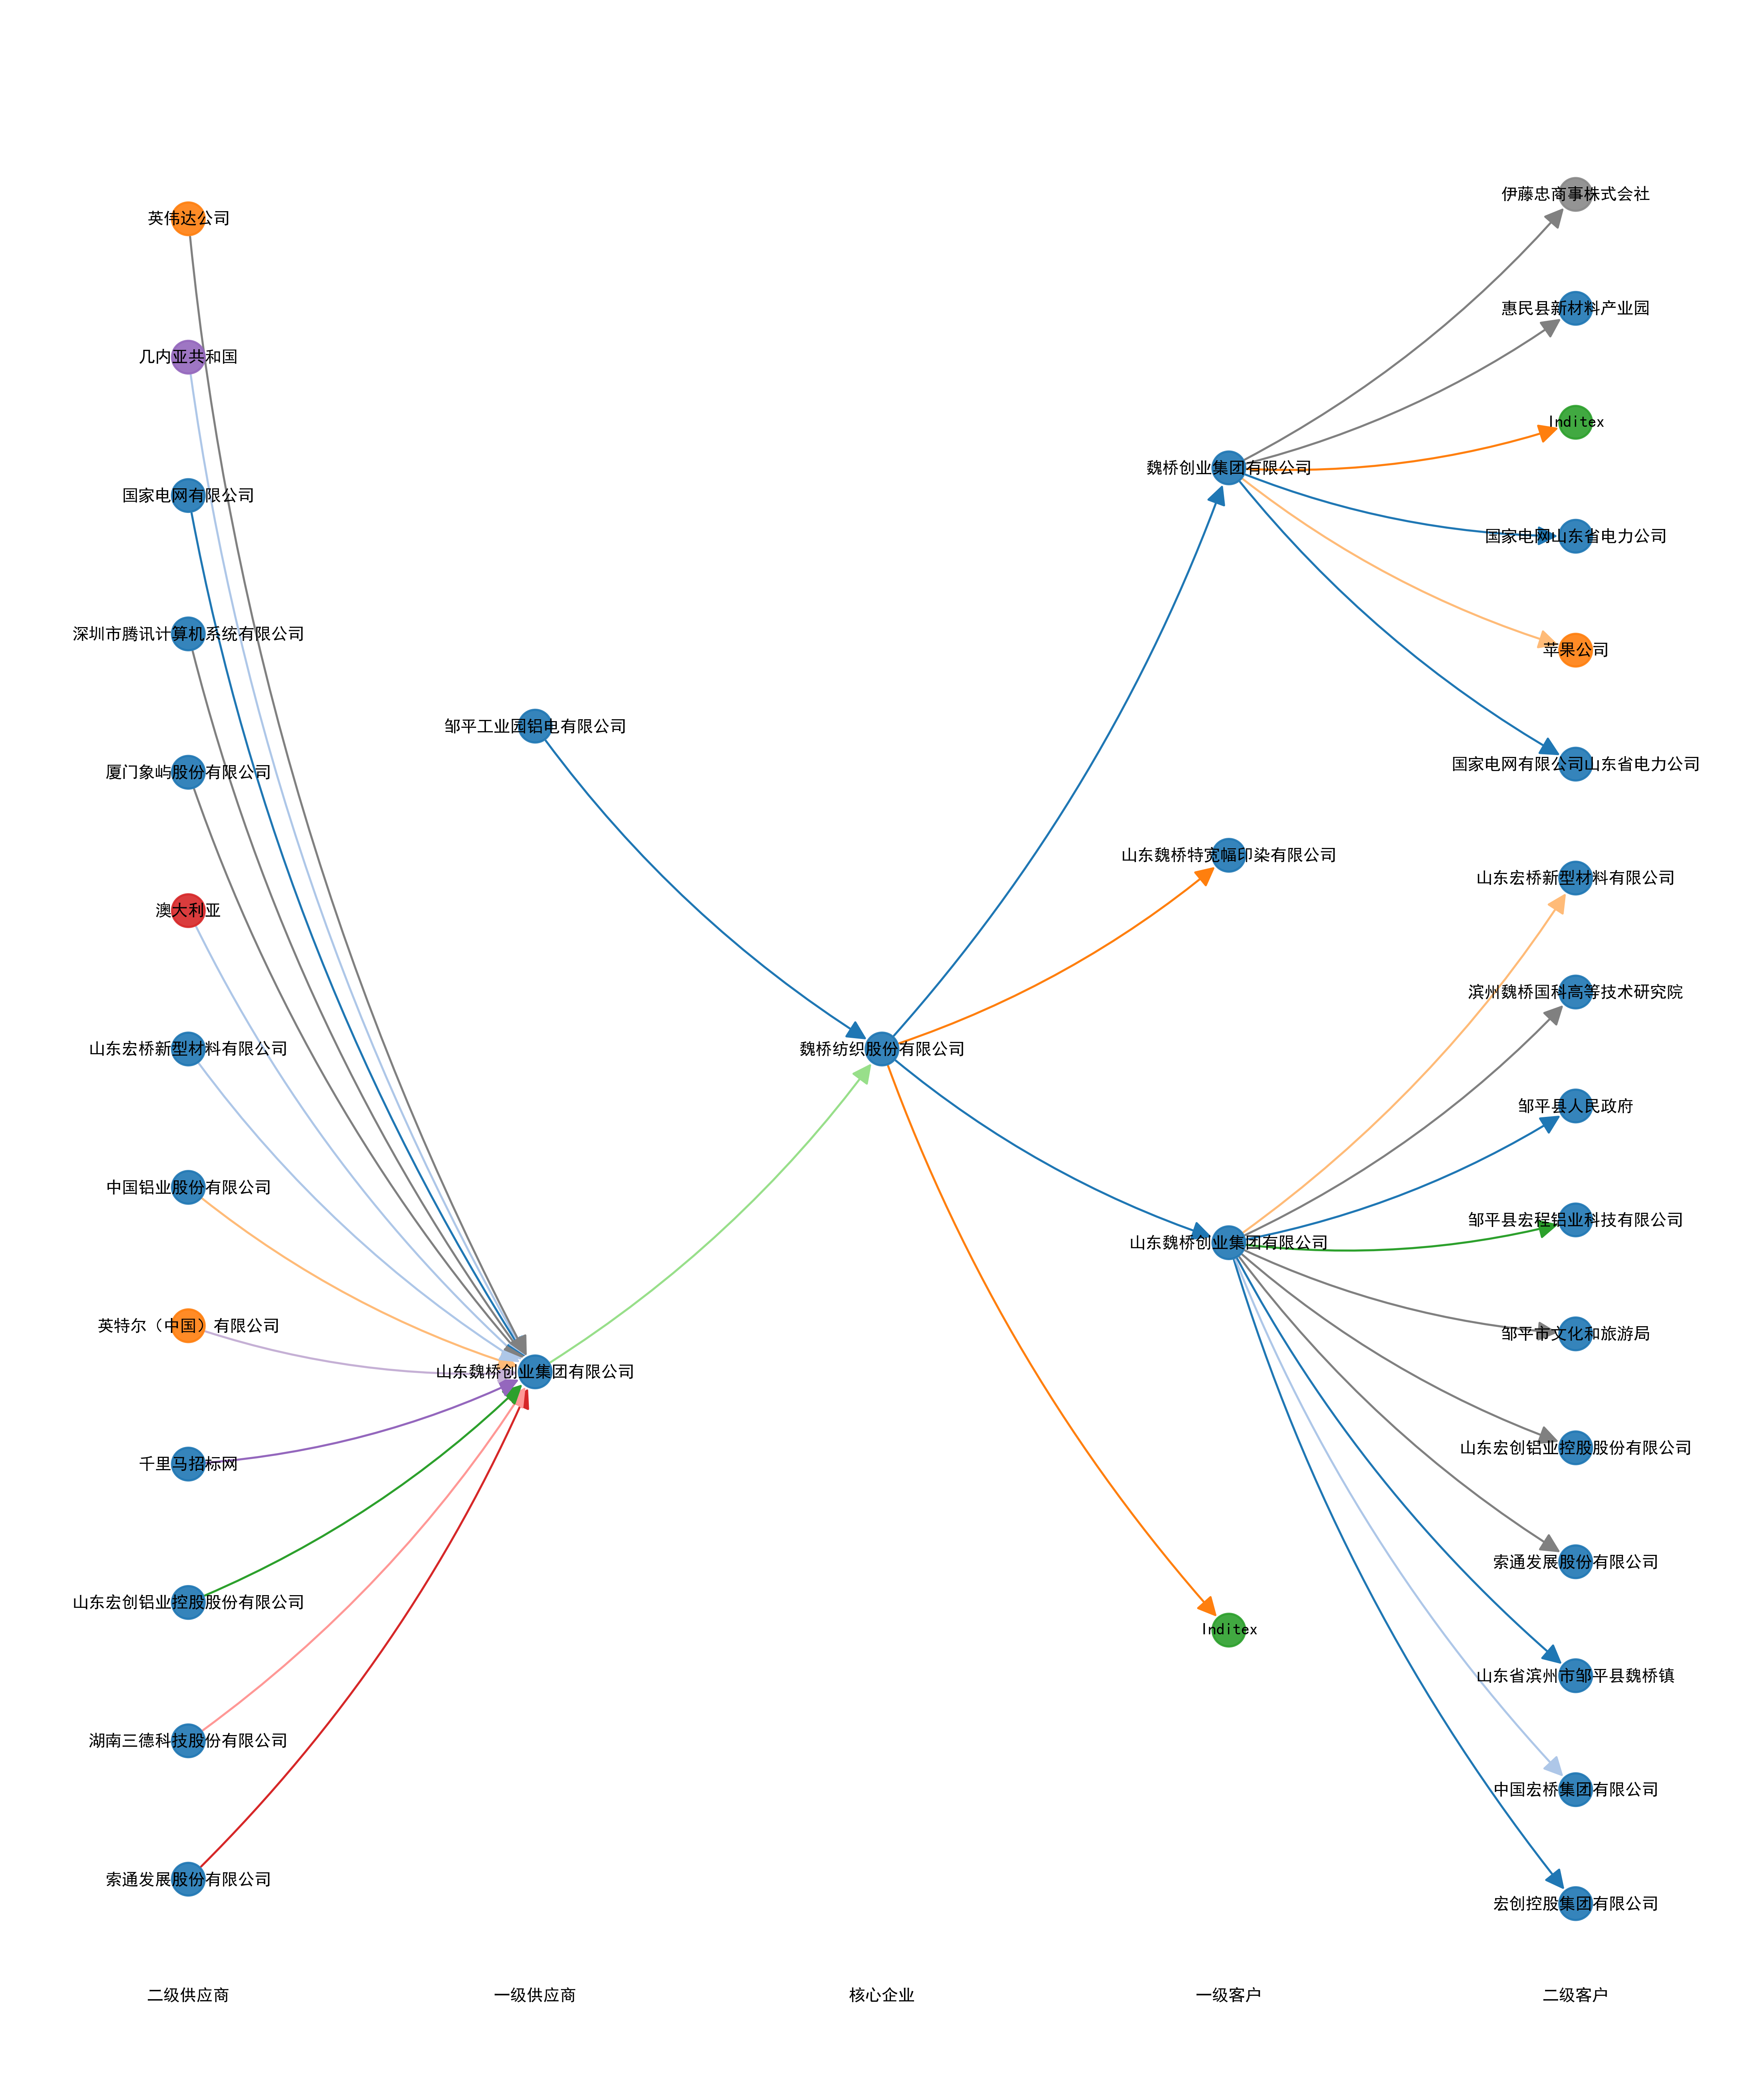

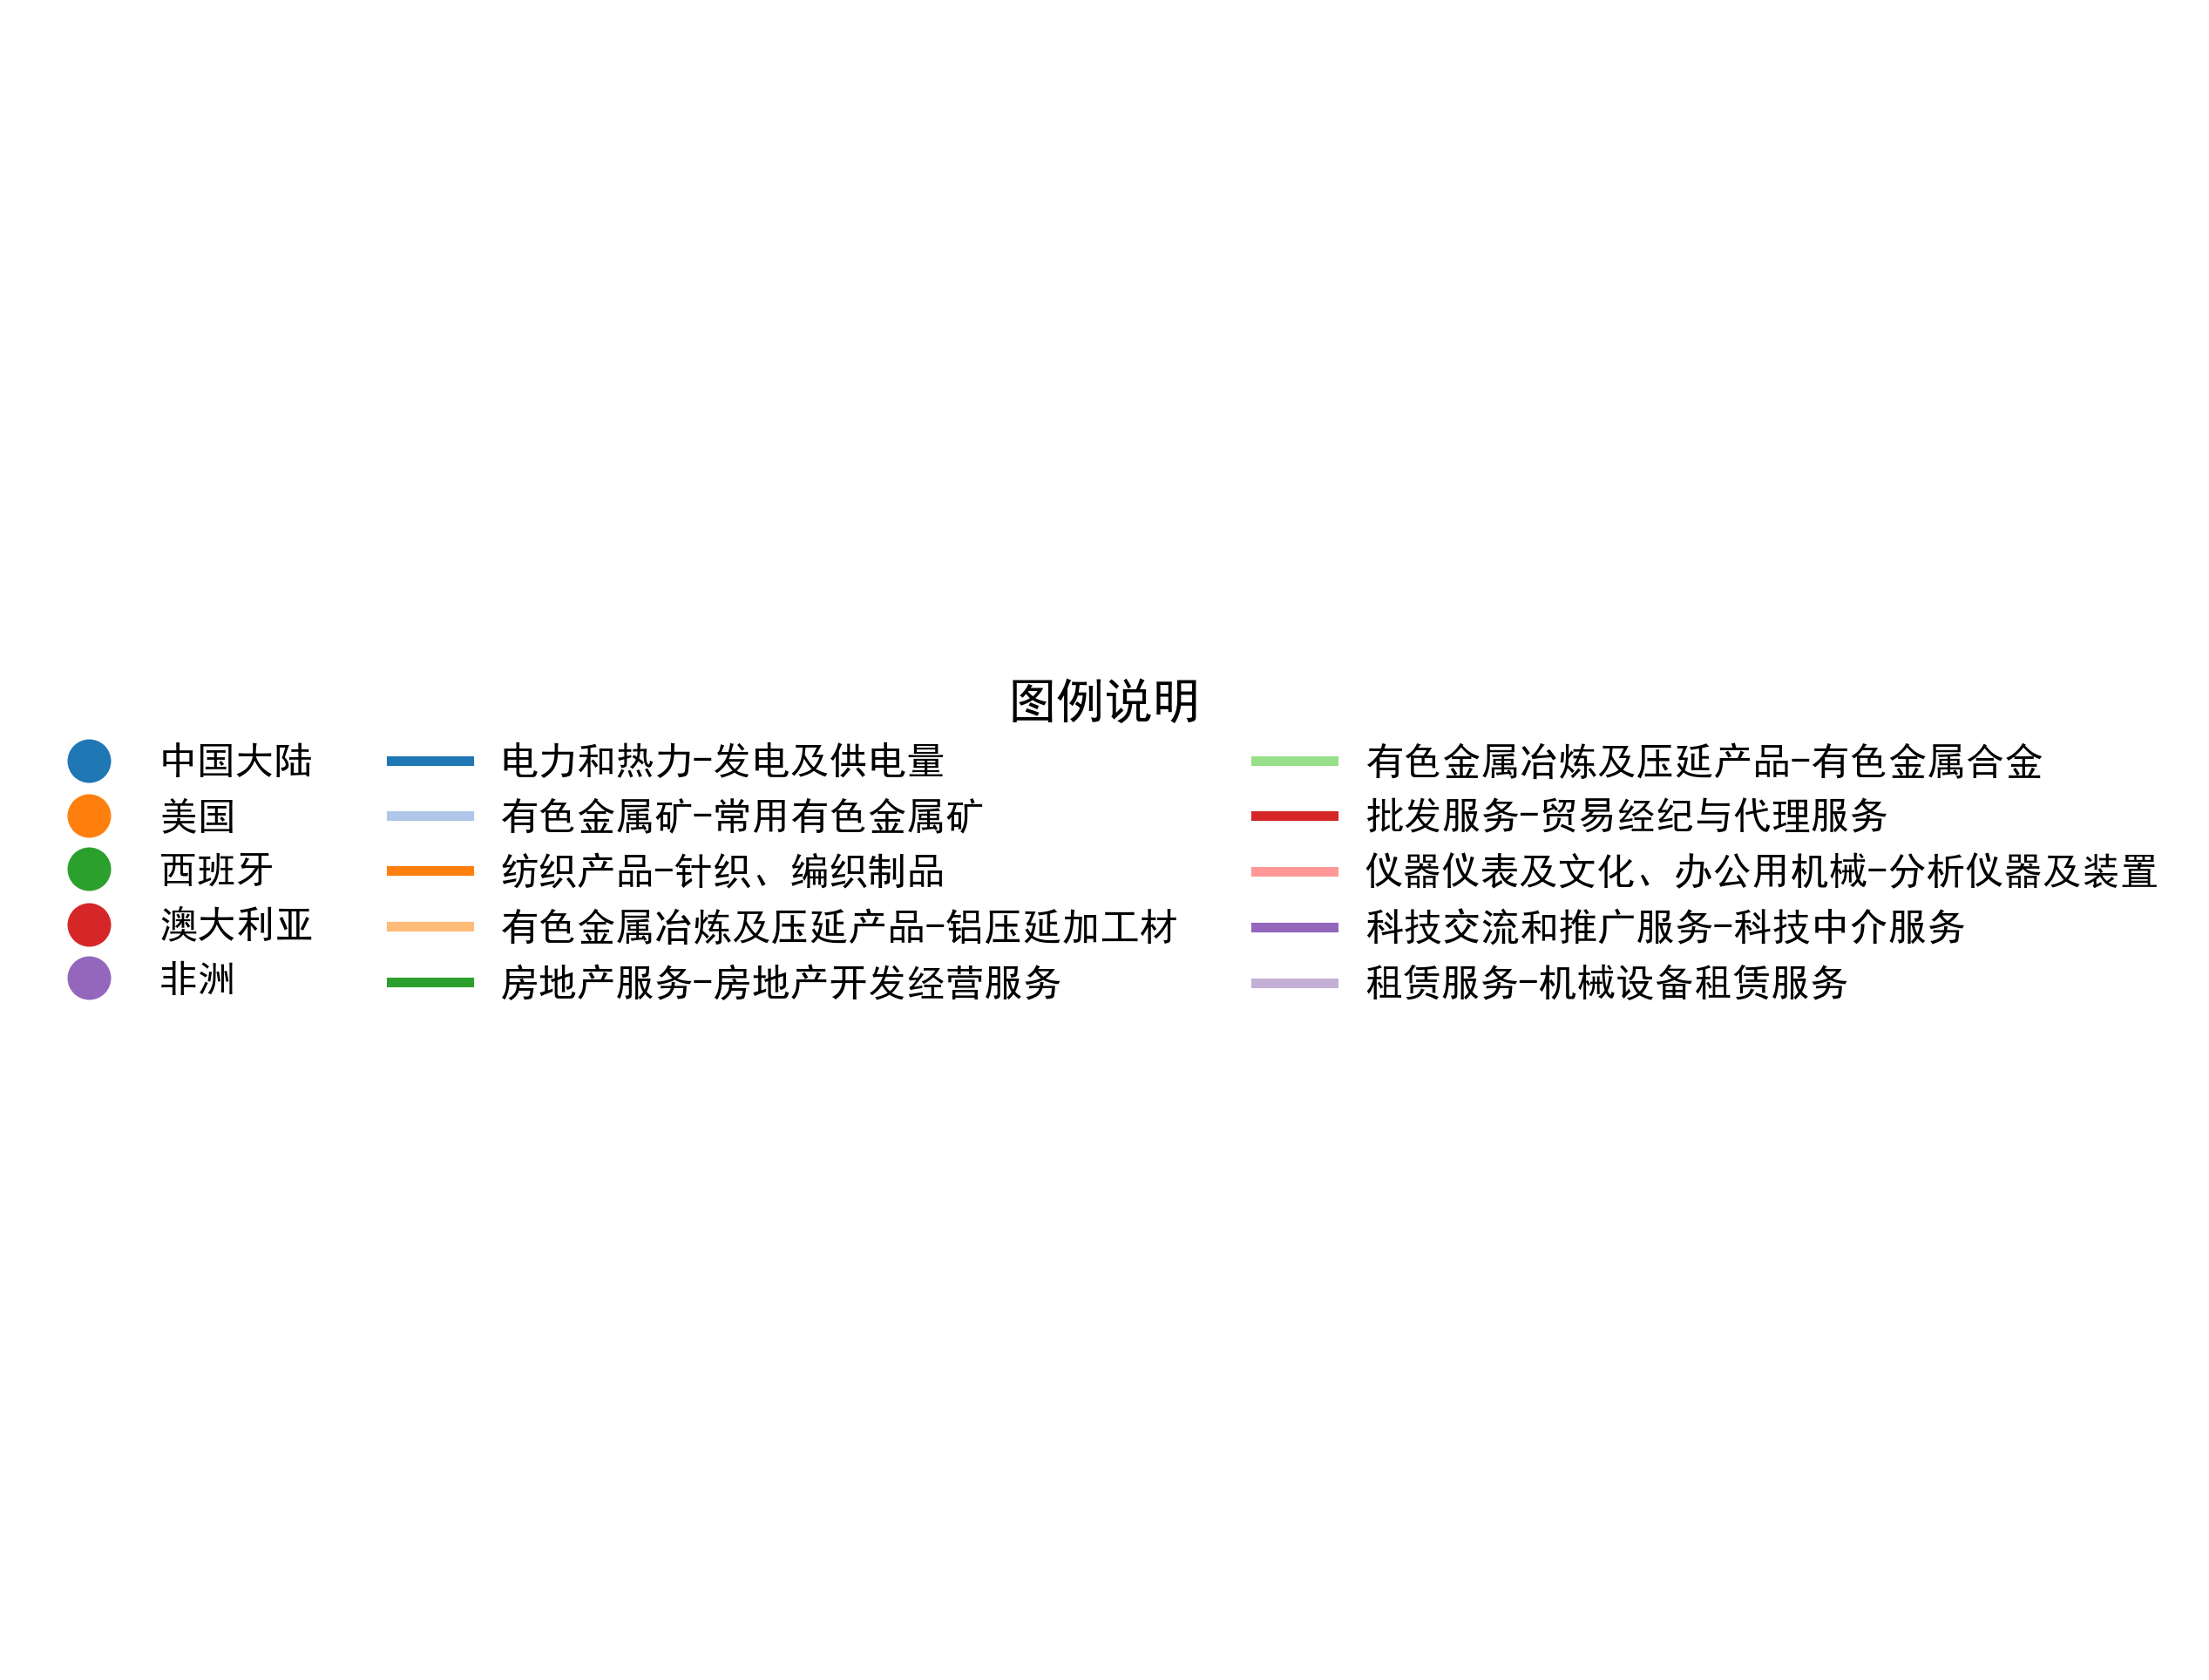

In [ ]:
import networkx as nx
from auxiliary.show import visualize_supply_chain, expand_to_double_tree

focal_company="魏桥纺织股份有限公司"

expanded=expand_to_double_tree(graph, focal_company, max_customer_depth=2, max_supplier_depth=2)
visualize_supply_chain(expanded, core_node=focal_company,
                          node_color_attr='country',
                          edge_color_attr='product_category_2',
                          node_size=250,
                          font_size=8,
                          # legend_pos='upper center',
                          legend_cols=3,
                          max_edge_attr=10,
                        #   max_node_attr=5,
                          figsize=[15, 18],
                          legend_font_scale=1,
                          forbidden_names=["未知","供应商","海关"],
                          dpi=400)
    

In [ ]:
# nx.write_graphml(expanded, r"result\魏桥-expand.graphml")

In [17]:
import json
import networkx as nx

with open(r"result\Weiqiao\Weiqiao纺织.json") as f:
    data=json.load(f)

# 创建有向图
G = nx.DiGraph()
center_node = "魏桥纺织"
G.add_node(center_node, country="中国大陆")

def add_supply_chain(entity, depth=0, parent=None):
    """递归添加供应链节点"""
    if depth > 2:  # 限制递归深度避免无限循环
        return
    if parent:
        G.add_edge(entity["name"], parent, product_category_2=entity["products"][0])
    else:
        G.add_edge(entity["name"], center_node, product_category_2=entity["products"][0])
    G.add_node(entity["name"], country=entity["country"])
    
    # 添加二级供应商
    if "suppliers" in entity:
        for supplier in entity["suppliers"]:
            add_supply_chain(supplier, depth+1, entity["name"])

# 处理供应商网络
for supplier_group in data["supplier_of_魏桥纺织"]:
    for entity in supplier_group["entities"]:
        add_supply_chain(entity)

# 处理客户网络
for customer_group in data["customer_of_魏桥纺织"]:
    for entity in customer_group["entities"]:
        G.add_node(entity["name"], country=entity["country"])
        G.add_edge(center_node, entity["name"], product_category_2=entity["products"][0])
        # 添加二级客户
        if "customers" in entity:
            for customer in entity["customers"]:
                G.add_node(customer["name"], country=customer["country"])
                G.add_edge(entity["name"], customer["name"], product_category_2=customer["products"][0])

# 验证网络结构
print("Nodes:", list(G.nodes(data=True))[:5])  # 示例输出前5个节点
print("Edges:", list(G.edges(data=True))[:5])  # 示例输出前5条边

Nodes: [('魏桥纺织', {'country': '中国大陆'}), ('新疆利华棉业', {'country': '中国大陆'}), ('新疆生产建设兵团棉企', {'country': '中国大陆'}), ('中粮集团（新疆）', {'country': '中国大陆'}), ('金光博汇集团', {'country': '中国/印尼'})]
Edges: [('魏桥纺织', 'INDITEX集团', {'product_category_2': '快时尚面料'}), ('魏桥纺织', '迪尚集团', {'product_category_2': '工装面料'}), ('魏桥纺织', '即发集团', {'product_category_2': '针织服装'}), ('魏桥纺织', '魏桥德国公司', {'product_category_2': '汽车轻量化材料'}), ('新疆利华棉业', '魏桥纺织', {'product_category_2': '长绒棉'})]


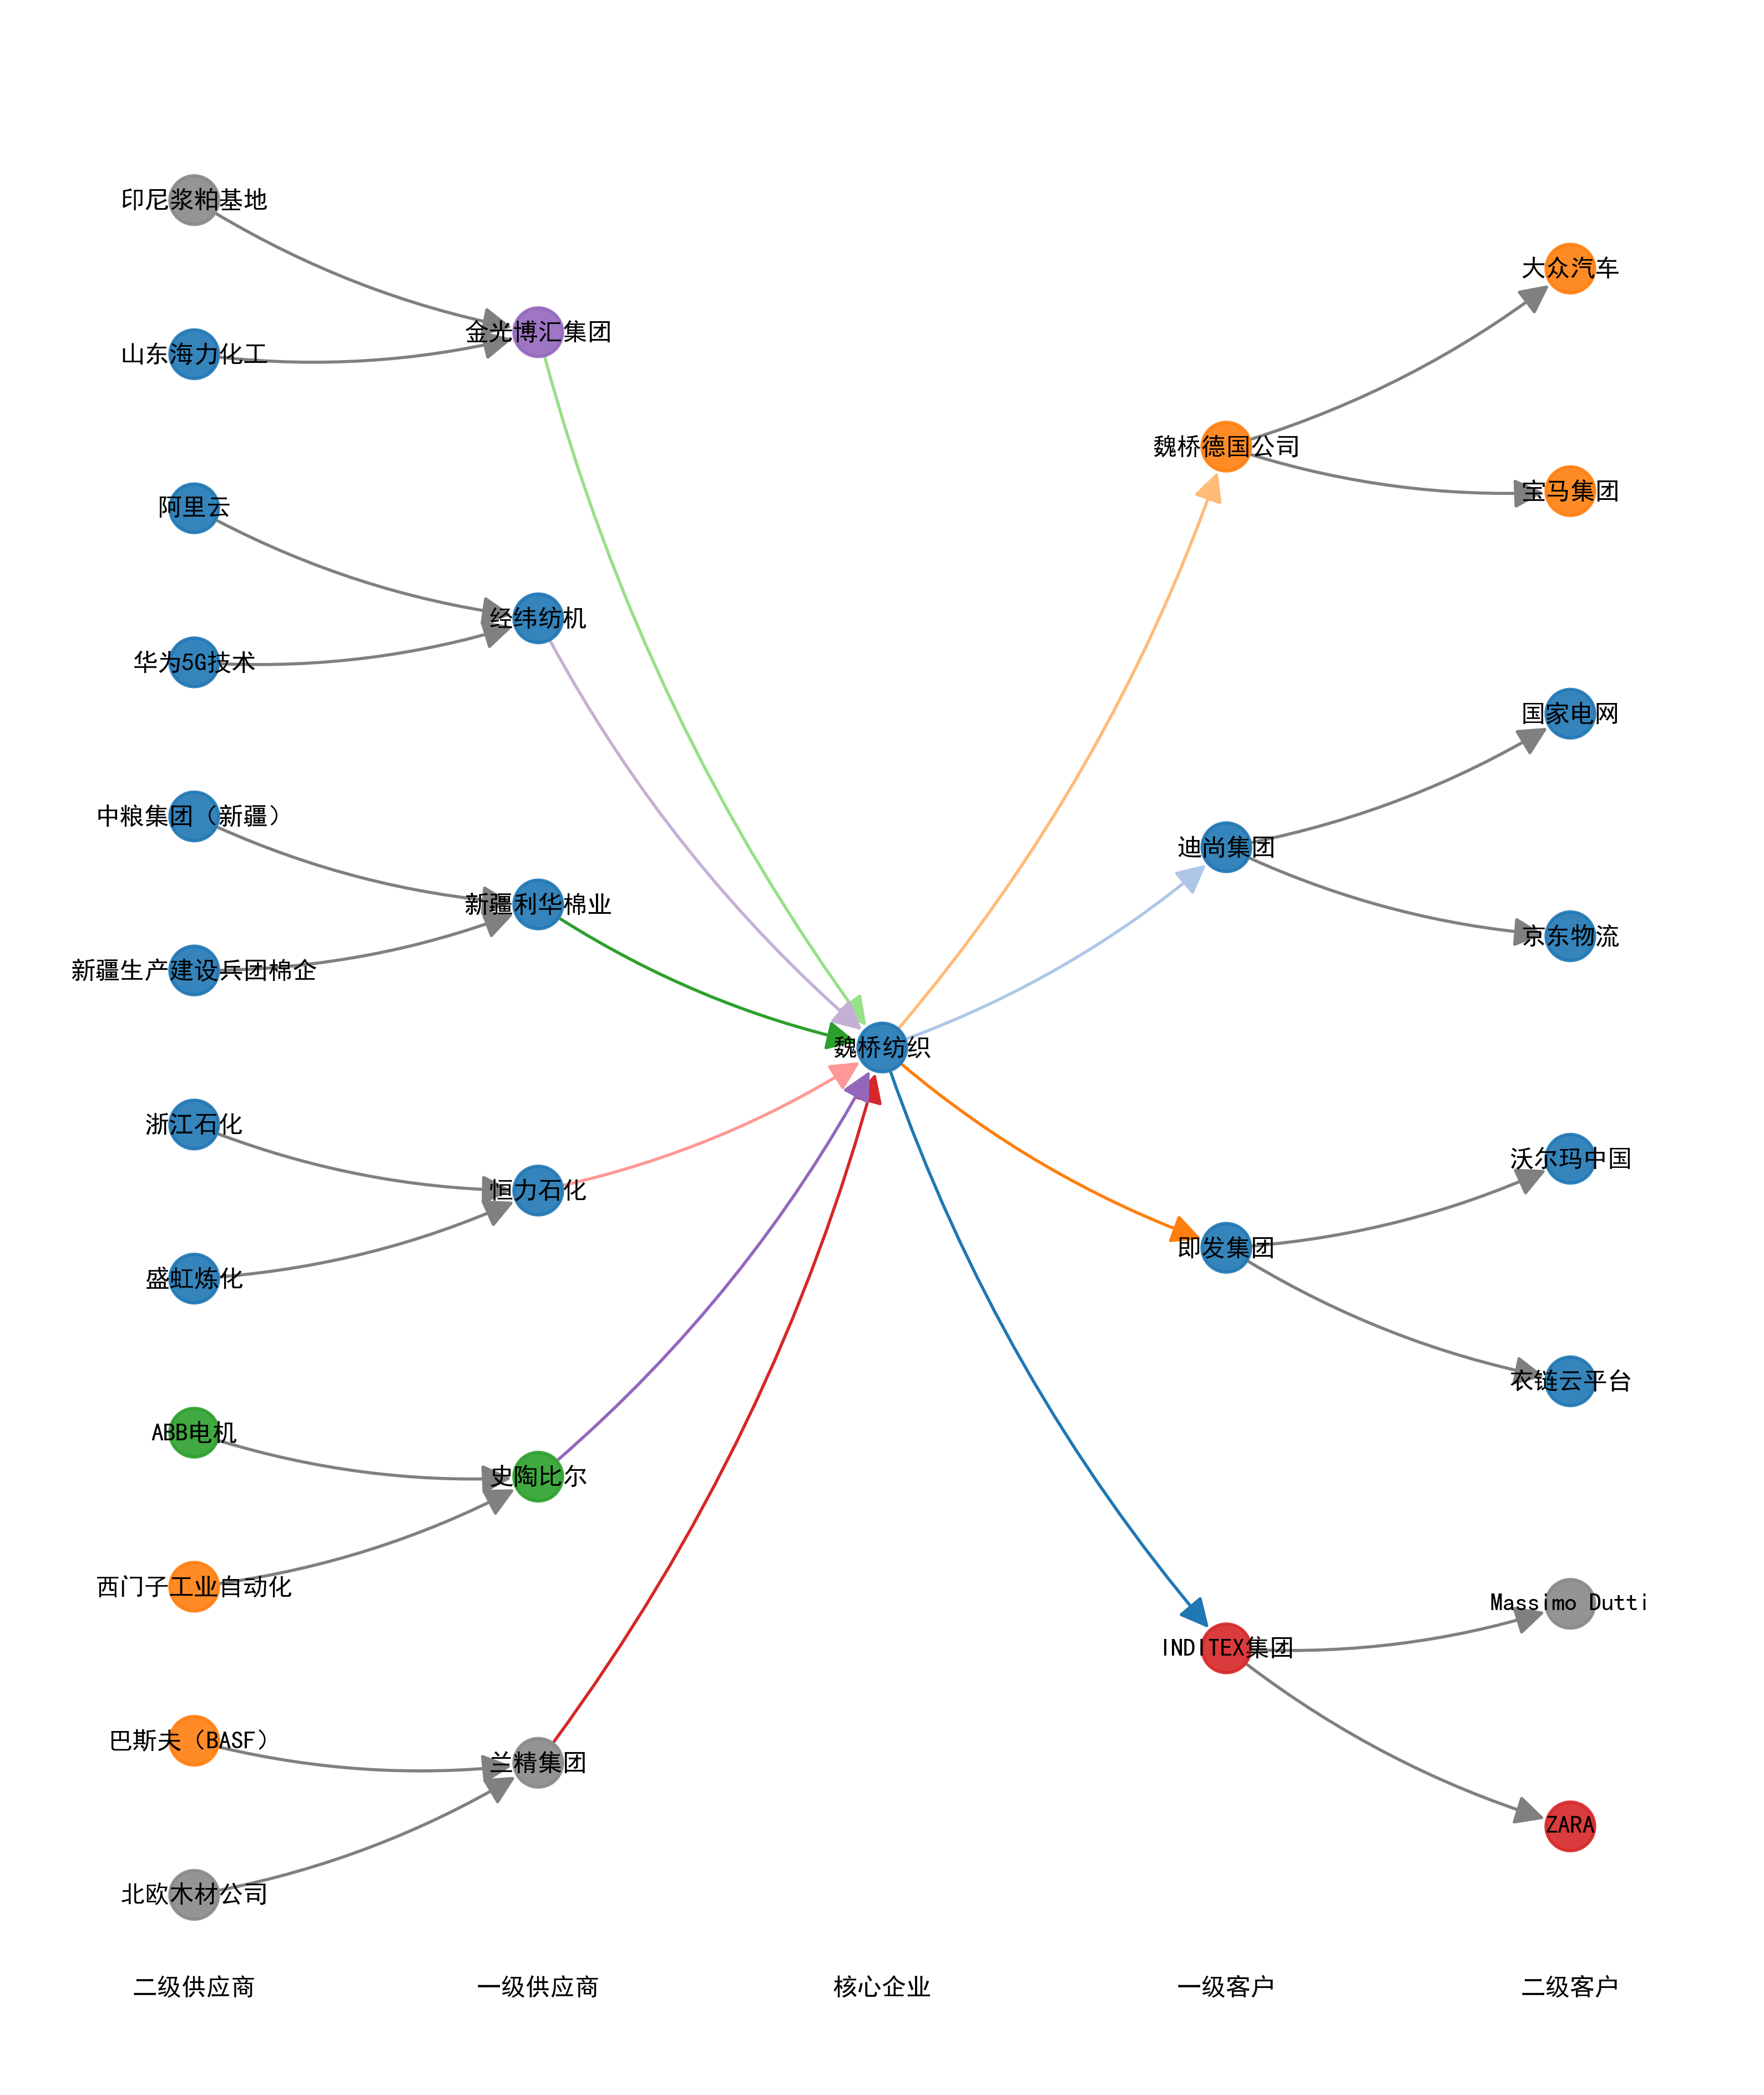

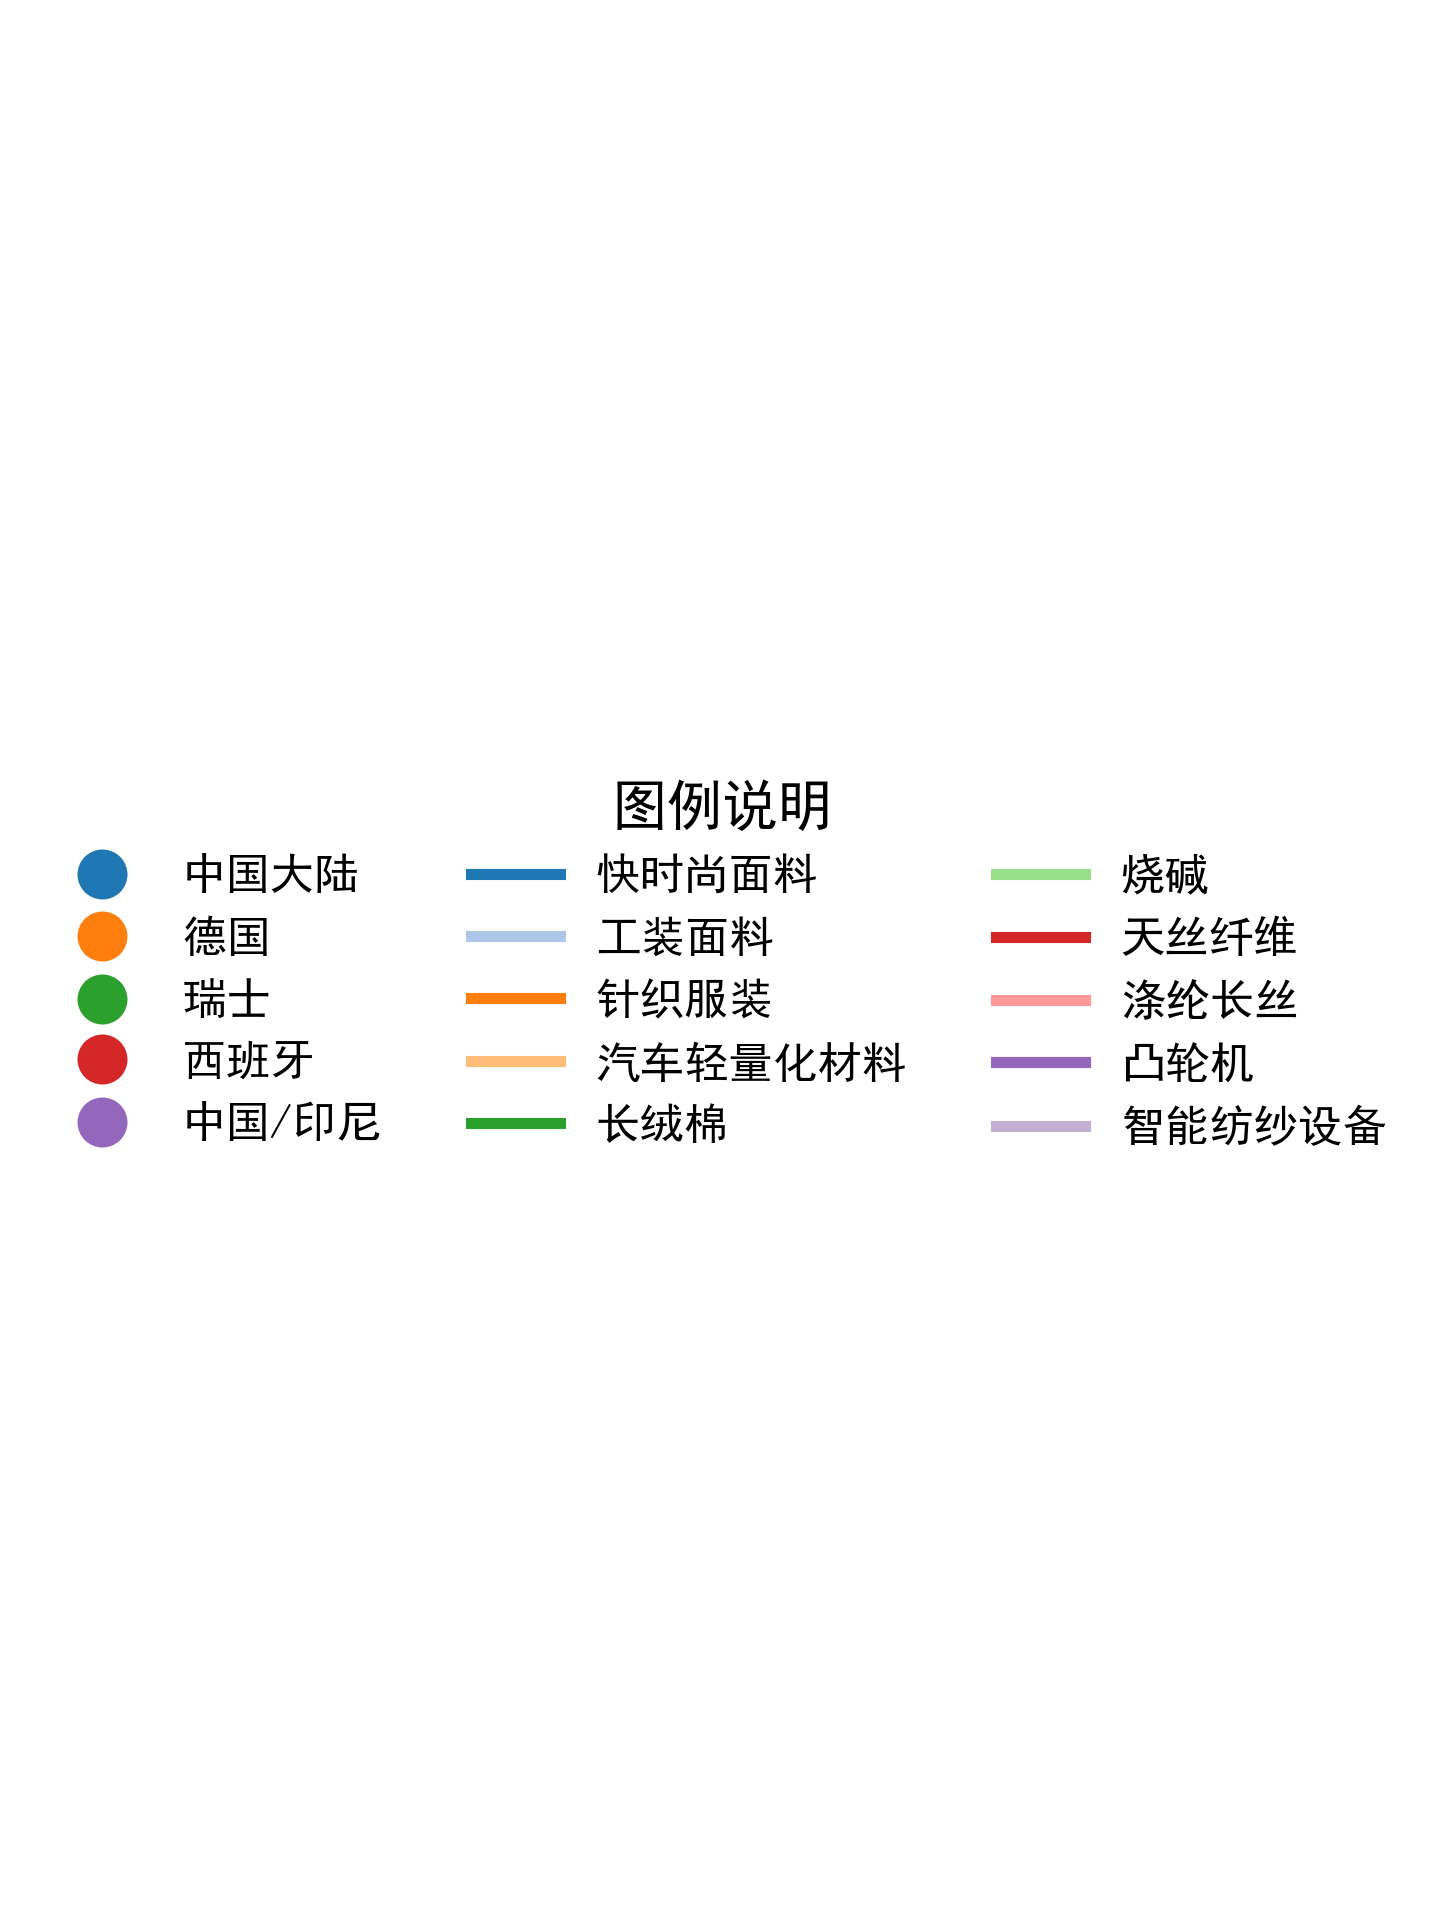

In [19]:
import networkx as nx
from auxiliary.show import visualize_supply_chain, expand_to_double_tree

focal_company="魏桥纺织"

expanded=expand_to_double_tree(G, focal_company, max_customer_depth=2, max_supplier_depth=2)
visualize_supply_chain(expanded, core_node=focal_company,
                          node_color_attr='country',
                          edge_color_attr='product_category_2',
                          node_size=250,
                          font_size=8,
                          # legend_pos='upper center',
                          legend_cols=3,
                          max_edge_attr=10,
                        #   max_node_attr=5,
                          figsize=[10, 12],
                          legend_font_scale=1,
                          forbidden_names=["未知","供应商","海关"],
                          dpi=400)
    